In [1526]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import datetime #do mierzenia czasu wykonania mojego algorytmu
import pickle #potrzebene do wyswietlenia naszych testow - uprzednio danych

from collections import deque
from random import randint
from copy import deepcopy
from sortedcontainers import SortedSet
from random import uniform
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

In [1527]:
TESTS = {}  #globala tablica, ktora przechowduje mi czasy wykonania

# Przydatne funkcje 

In [1528]:
def draw_example_1():
    vis = Visualizer()
    line_segments = [
                    ((-0.5, 0.5), (8.5, 3.5)),
                     ((1, 3), (7, 5)),
                     ((2, 4), (5, 1)),
                     ((4.5, 3), (6.5, 6)),
                     ((0, 5), (5.5, 5.5))]

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = [(-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5)]
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()

def getMyPoint(pointsTab):
    n = len(pointsTab)
    sol = []
    for i in range(n):
        sol.append(pointsTab[i][0])
    return sol

def drawSectionWithCut(sectionsTab,pointsTab):
    vis = Visualizer()
    vis.add_line_segment(sectionsTab)
    vis.add_point(pointsTab, color = 'red')
    vis.show()

def drawSections(sectionsTab):
    vis = Visualizer()
    vis.add_line_segment(sectionsTab)
    vis.show()

def draw_with_cut(sectionsTab,pointsTab):
    vis = Visualizer()
    points = getMyPoint(pointsTab)
    vis.add_line_segment(sectionsTab)
    vis.add_point(points, color = 'red')
    vis.show()

In [1529]:
def load_clicked_tests():
    with open('lines.pkl', 'rb') as file:
        sections = pickle.load(file)
    return sections

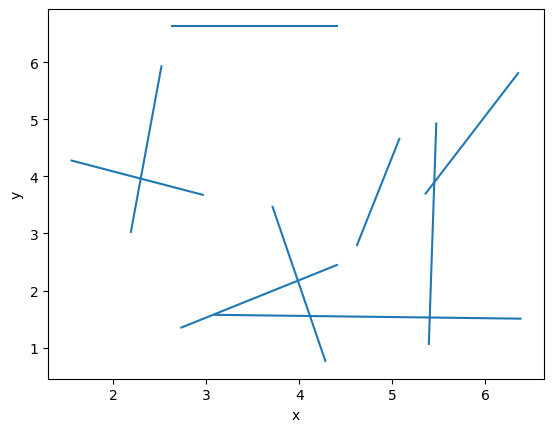

In [1530]:
sectionsGen = load_clicked_tests()
drawSections(sectionsGen)

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

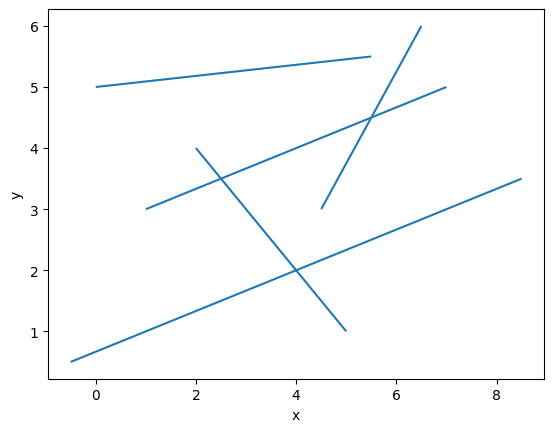

In [1531]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

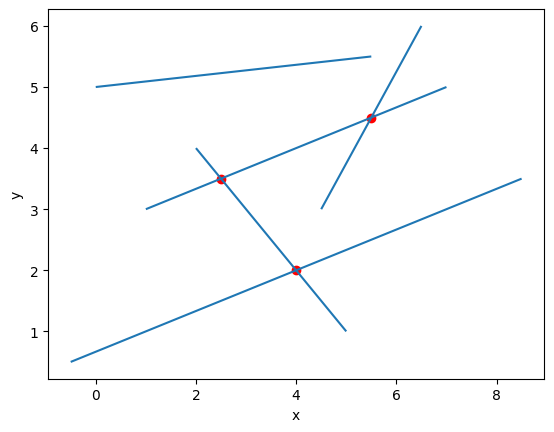

In [1532]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [1533]:
def int_generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów.
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    sectionsTab = []
    endsSectionTab = []

    for i in range(n):
        xPoint1 = randint(0,max_x)
        yPoint1 = randint(0,max_y)

        xPoint2 = randint(0,max_x)
        yPoint2 = randint(0,max_y)

        while xPoint2 == xPoint1 or xPoint2 in endsSectionTab: #zabezpiecznie przed stworzeniem odcinka pionowego
            xPoint2 = randint(0,max_x)

        endsSectionTab.append(xPoint2)
        sectionsTab.append( ( (xPoint1,yPoint1),(xPoint2,yPoint2) ) )
    drawSections(sectionsTab)
    return sectionsTab

In [1534]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    sectionsTab = []
    endsSectionTab = []

    for i in range(n):
        xPoint1 = uniform(0,max_x)
        yPoint1 = uniform(0,max_y)

        xPoint2 = uniform(0,max_x)
        yPoint2 = uniform(0,max_y)

        while xPoint2 == xPoint1 or xPoint2 in endsSectionTab: #zabezpiecznie przed stworzeniem odcinka pionowego
            xPoint2 = uniform(0,max_x)

        endsSectionTab.append(xPoint2)
        sectionsTab.append( ( (xPoint1,yPoint1),(xPoint2,yPoint2) ) )
    drawSections(sectionsTab)
    return sectionsTab

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.959s


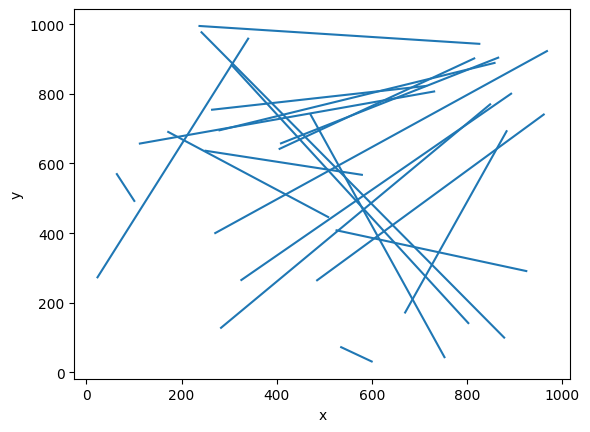

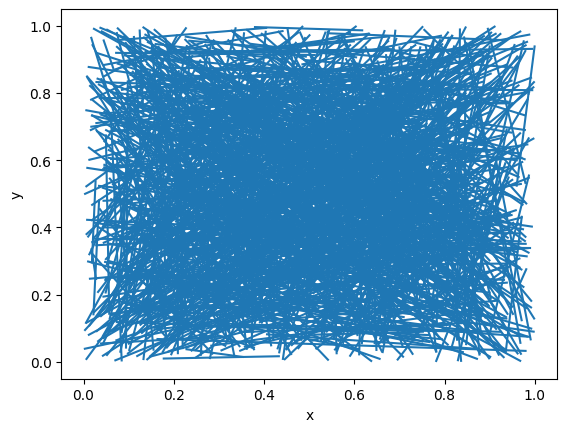

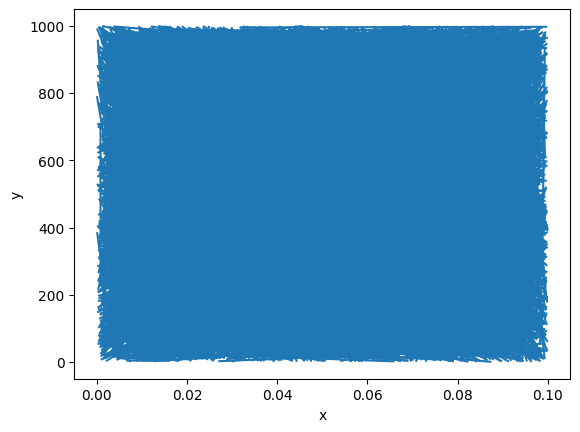

In [1535]:
Test().runtest(1, generate_uniform_sections)

<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

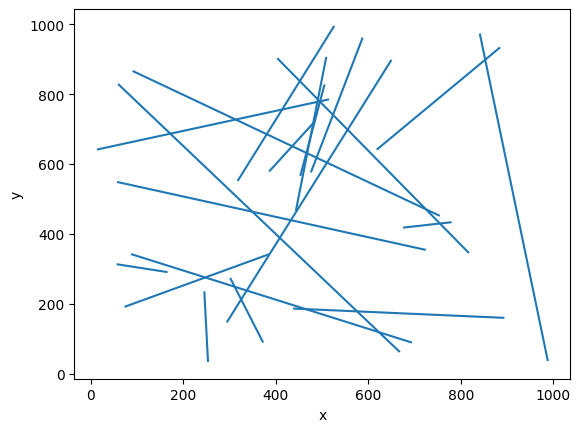

In [1536]:
sectionsGenerated = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

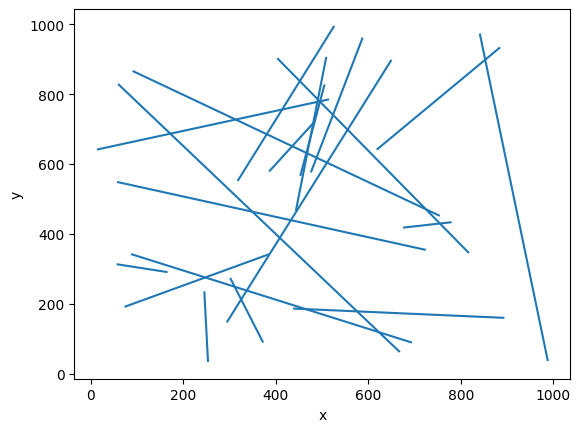

In [1537]:
drawSections(sectionsGenerated)

In [1538]:
def mat_det_2x2(a, b, c): #wyznacznik 2x2
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    return (a_x-c_x)*(b_y-c_y)-(a_y-c_y)*(b_x-c_x)

In [1539]:
def get_orientation(actuall_orientation):
    if actuall_orientation > 0: return 1
    elif actuall_orientation < 0: return -1
    return 0

In [1540]:
def is_intersection_between_two_points(a, b, c, d):

    o1 = get_orientation(mat_det_2x2(a,b,c))
    o2 = get_orientation(mat_det_2x2(a,b,d))

    o3 = get_orientation(mat_det_2x2(c,d,a))
    o4 = get_orientation(mat_det_2x2(c,d,b))

    if o1 != o2 and o3 != o4:
        return True

    return False

In [1541]:
#Funkcja znajduje przeciecie miedzy dwoma odcinkami
#danymi w postaci krotek punktow
#jesli oba odcinki sie nie przecianja to zwracamy None
def findIntersection(abLine, cdLine):
    pointA = abLine.pointA
    pointB = abLine.pointB

    pointC = cdLine.pointA
    pointD = cdLine.pointB

    if not is_intersection_between_two_points(pointA, pointB, pointC, pointD):
        return None

    return (cdLine.factorB - abLine.factorB) / (abLine.factorA - cdLine.factorA)

In [1542]:
#Funkcja dodaje indexy do naszych odcinkow, abysmy mogli latwo je zidentyfikowac
def addIndexToSection(sections):
    n = len(sections)
    for i in range(n):
        point1 = sections[i][0]
        point2 = sections[i][1]
        sections[i] = (point1,point2,i)
    return sections

In [1543]:
#Funkcja tworzy tablice obiektow klasy LineFunctions dla danych odcinkow, przyda sie to nam
#jesli bedziemy chcieli obliczyc dla stanu miotly stan naszej wartosci w danym punkcie
def createFunctionLine(sections):
    n = len(sections)
    segmentsTabFunction = []

    for i in range(n): #przegladam po koleji nasze przeciecia
        a = sections[i][0]
        b = sections[i][1]
        abSegment = LineFunction(a,b)
        segmentsTabFunction.append(abSegment)

    return segmentsTabFunction #tablica elemnetow klas

In [1544]:
#Funkcja stworzy mi poczatkowa strukturze zdarzen czyli
#stworzy mi punkty poczatkowe i koncowe moich odcinkow,
#na wejsciu otrzymuje sections - juz z danymi indexami
def createStartEventStructure(sections, E = None, visSections = None):
    n = len(sections)
    Q = SortedSet()
    pointsToView = []

    for i in range(n):
        a = sections[i][0]
        b = sections[i][1]
        if E is not None:
            pointsToView.append(a)
            pointsToView.append(b)
        abSegmentID = sections[i][2]
        eventPointStart = PointQ(a[0], a[1], abSegmentID, 0) #poczatek odcinka
        eventPointEnd = PointQ(b[0], b[1], abSegmentID, 1) #koniec odcinka
        Q.add(eventPointStart)
        Q.add(eventPointEnd)

    if E is not None:
        E.append(visSections.add_point(pointsToView,color = "green"))

    return Q

In [1545]:
def getLenMap(elems):
    n = 0
    for _ in elems:
        n += 1
    return n

In [1546]:
def getElemsLeft(T,newPoint):
    elemsLeft = T.irange(float('-inf'),newPoint)
    elemsLeftTab = []
    for elem in elemsLeft:
        elemsLeftTab.append(elem)
    return elemsLeftTab

In [1547]:
def getElemsRight(T,newPoint):
    elemsRight = T.irange(newPoint, float('inf'))
    elemsRightTab = []
    for elem in elemsRight:
        elemsRightTab.append(elem)
    return elemsRightTab

In [1548]:
#Funkcja bedzie zwracac odpowiednio gorny oraz dolny punkt wzgledem tego ktorego badamy,
#lub None kiedy nie ma, format w jakim bedziemy zwracac to (gorny_sasiad,dolny_sasiad)
def getBottomUpperPoint(T,sweep):
    newPoint = PointT(sweep.x, sweep.y, sweep.lineID)
    elemsLeft = getElemsLeft(T, newPoint)
    elemsRight = getElemsRight(T, newPoint)

    upper_neigh = None
    bottom_neigh = None

    if len(elemsLeft) > 1: upper_neigh = elemsLeft[-2]
    if len(elemsRight) > 1: bottom_neigh = elemsRight[1]

    return upper_neigh, bottom_neigh

In [1549]:
#Funkcja aktualizujaca strukture stanu, kiedy to
#nasz znowo rozpatrywany punkt znajduje sie na samym poczatku odcinka
def broomAtTheBeggingSegment(Q,T,sweep,segmentsTabFunction, intersectsTab,E = [],visSections = None,is_section = False):
    sweep_x = sweep.x  # to jest moja miotla ktora znajduje sie wlasnie w tym punkcie
    sweep_y = sweep.y  # wartosc miotly w punkcie x
    T_elements = T.irange(float('-inf'), float('inf'))  # mam dostep teraz do kazdego elementu ktory jest w T
    T.clear()

    for oldPoint in T_elements:
        oldFunctionID = oldPoint.lineID  # pozyskuje ID na funkcje do ktorej nalezy odcinek na ktorym lezy ten wlasnie ten punkt
        oldFunction = segmentsTabFunction[oldFunctionID]
        newValue = oldFunction.calculateY(sweep_x)
        newPoint = PointT(sweep_x, newValue, oldFunctionID)
        T.add(newPoint)

    # dodaje takze moj punkt glowny od ktorego zaczalem

    newPoint = PointT(sweep_x, sweep_y, sweep.lineID)
    T.add(newPoint)

    # po zautualizowaniu naszej struktury poprzez poczatek odcinka jedyna rzecz jaka moze sie wydarzyc to wsadzenie
    # elemntu danego po srodku a wiec trzeba srpawedzic kto ma jakich nowych sasiadow i tych sasidaow sprawdzic przecicia
    # i eweneutlanie te nowe przeciecia nalezy zwrocic

    upper_neigh, bottom_neigh = getBottomUpperPoint(T, sweep)

    D = deque() #kolejka potrzeba mi aby zwizualizowac jakie krawedzie aktulanie porownuje

    if bottom_neigh is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[newPoint.lineID].pointA,segmentsTabFunction[newPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[bottom_neigh.lineID].pointA,segmentsTabFunction[bottom_neigh.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)

        intersect = findIntersection(segmentsTabFunction[newPoint.lineID], segmentsTabFunction[bottom_neigh.lineID])
        if intersect is not None \
                and not (newPoint.lineID, bottom_neigh.lineID) in intersectsTab \
                and not (bottom_neigh.lineID,
                         newPoint.lineID) in intersectsTab:  # istnieje przeciecie miedzy gornym a dolnym
            x_intersect = intersect
            y_intersect = segmentsTabFunction[sweep.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, sweep.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((bottom_neigh.lineID, sweep.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            #zabezpieczam sie przed tym, jesli chce po prostu sprawedzic czy cos sie przecina
            #i nie koniecznie interesuja mnie wszystkie mozliwe przeciecia
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())


    if upper_neigh is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[newPoint.lineID].pointA,segmentsTabFunction[newPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[upper_neigh.lineID].pointA,segmentsTabFunction[upper_neigh.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[newPoint.lineID], segmentsTabFunction[upper_neigh.lineID])
        if intersect is not None \
                and not (newPoint.lineID, upper_neigh.lineID) in intersectsTab \
                and not (upper_neigh.lineID,
                         newPoint.lineID) in intersectsTab:  # istnieje przeciecie miedzy gornym a dolnym
            x_intersect = intersect
            y_intersect = segmentsTabFunction[sweep.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, sweep.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((upper_neigh.lineID, sweep.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    return Q, T, intersectsTab

In [1550]:
#Funkcja aktualizujaca strukture stanu kiedy punkt
#znajduje sie na samym koncu odcnka - czyli go usuwa
def broomAtTheEndSegment(Q,T,sweep,segmentsTabFunction, intersectsTab,E = [],visSections = None,is_section = False):
    sweep_x = sweep.x  # to jest moja miotla ktora znajduje sie wlasnie w tym punkcie
    sweep_y = sweep.y  # wartosc miotly w punkcie x

    # Dla jeszcze stanu T przed usunieciem odpowiedniego punktu - musze zapisac jego odpowiednich sasiadow
    upper_neigh, bottom_neigh = getBottomUpperPoint(T, sweep)

    T_elements = T.irange(float('-inf'), float('inf'))  # mam dostep teraz do kazdego elementu ktory jest w T
    T.clear()

    for oldPoint in T_elements:  # nastepuje tutaj aktualizacja juz istniejacych punktow
        oldFunctionID = oldPoint.lineID  # pozyskuje ID na funkcje do ktorej nalezy odcinek na ktorym lezy ten wlasnie ten punkt
        if oldFunctionID != sweep.lineID:  # jest to wspolmierne z usunieciem wlasnie tego odcinka ktorego jest koniec
            oldFunction = segmentsTabFunction[oldFunctionID]
            newValue = oldFunction.calculateY(sweep_x)
            newPoint = PointT(sweep_x, newValue, oldFunctionID)
            T.add(newPoint)

    D = deque() #kolejka potrzeba mi aby zwizualizowac jakie krawedzie aktulanie porownuje

    # znaczy to ze usuniety punkt byl po srodku, a wiec musze sprawdzic czy te punkty sie teraz przecianaja
    # jesli usuniety punkt byl na jakims z brzegow to po prostu go usuwam
    if upper_neigh is not None and bottom_neigh is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[upper_neigh.lineID].pointA,segmentsTabFunction[upper_neigh.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[bottom_neigh.lineID].pointA,segmentsTabFunction[bottom_neigh.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[upper_neigh.lineID], segmentsTabFunction[bottom_neigh.lineID])
        if intersect is not None \
                and not (upper_neigh.lineID, bottom_neigh.lineID) in intersectsTab \
                and not (bottom_neigh.lineID,
                         upper_neigh.lineID) in intersectsTab:  # istnieje przeciecie miedzy gornym a dolnym
            x_intersect = intersect
            y_intersect = segmentsTabFunction[upper_neigh.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, upper_neigh.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((upper_neigh.lineID, bottom_neigh.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None and E:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    return Q, T, intersectsTab

In [1551]:
#Funkcja aktualizujaca strukture stanu kiedy punkt
#znajduje na przecieciu odcinkow, dodatkowo bedzie potrzebna informacja
#prostych ktore sa przecinane
def broomAtTheCuttingSegment(Q, T, sweep, segmentsTabFunction, intersectsTab, lineA, lineB,
                             E = [],visSections = None,is_section = False):
    sweep_x = sweep.x  # to jest moja miotla ktora znajduje sie wlasnie w tym punkcie
    sweep_y = sweep.y  # wartosc miotly w punkcie x

    T_elements = T.irange(float('-inf'), float('inf'))  # mam dostep teraz do kazdego elementu ktory jest w T
    T.clear()

    for oldPoint in T_elements:  # nastepuje tutaj aktualizacja juz istniejacych punktowx
        oldFunctionID = oldPoint.lineID  # pozyskuje ID na funkcje do ktorej nalezy odcinek na ktorym lezy ten wlasnie ten punkt
        if oldFunctionID != lineA and oldFunctionID != lineB:
            oldFunction = segmentsTabFunction[oldFunctionID]
            newValue = oldFunction.calculateY(sweep_x)
            newPoint = PointT(sweep_x, newValue, oldFunctionID)
            T.add(newPoint)
        else:  # Dany punkt nalezy do tej prostej - znaczy ze trzeba go przesunac
            oldFunction = segmentsTabFunction[oldFunctionID]
            newValue = oldFunction.calculateY(sweep_x + 0.0000001)  # dodaje maly epsilon, aby punkty w mojej strukturze sie zamienily
            newPoint = PointT(sweep_x, newValue, oldFunctionID)  # nie dodaje epsilony aby nie zaburzyc dzialania
            T.add(newPoint)


    lineAPoint = -1
    lineBPoint = -1

    T_elementsNew = T.irange(float('-inf'), float('inf'))

    for point in T_elementsNew:  # poszukiwania punktu nalezacego do prostej lineA oraz lineB
        functionIDPoint = point.lineID
        if functionIDPoint == lineA:
            lineAPoint = point
        if functionIDPoint == lineB:
            lineBPoint = point

    lineAPointNeighUpper, lineAPointNeighBottom = getBottomUpperPoint(T, lineAPoint)
    lineBPointNeighUpper, lineBPointNeighBottom = getBottomUpperPoint(T, lineBPoint)

    if lineAPointNeighUpper is not None and lineAPointNeighUpper.lineID == lineBPoint.lineID:
        lineAPointNeighUpper = None

    if lineAPointNeighBottom is not None and lineAPointNeighBottom.lineID == lineBPoint.lineID:
        lineAPointNeighBottom = None

    if lineBPointNeighUpper is not None and lineBPointNeighUpper.lineID == lineAPoint.lineID:
        lineBPointNeighUpper = None

    if lineBPointNeighBottom is not None and lineBPointNeighBottom.lineID == lineAPoint.lineID:
        lineBPointNeighBottom = None

    D = deque() #kolejka potrzeba mi aby zwizualizowac jakie krawedzie aktulanie porownuje

    if lineAPointNeighBottom is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[lineAPoint.lineID].pointA,segmentsTabFunction[lineAPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[lineAPointNeighBottom.lineID].pointA,segmentsTabFunction[lineAPointNeighBottom.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[lineAPoint.lineID],
                                     segmentsTabFunction[lineAPointNeighBottom.lineID])
        if intersect is not None \
                and not (lineAPoint.lineID, lineAPointNeighBottom.lineID) in intersectsTab \
                and not (lineAPointNeighBottom.lineID, lineAPoint.lineID) in intersectsTab:
            x_intersect = intersect
            y_intersect = segmentsTabFunction[lineAPoint.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, lineAPoint.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((lineAPointNeighBottom.lineID, lineAPoint.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    if lineAPointNeighUpper is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[lineAPoint.lineID].pointA,segmentsTabFunction[lineAPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[lineAPointNeighUpper.lineID].pointA,segmentsTabFunction[lineAPointNeighUpper.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[lineAPoint.lineID],
                                     segmentsTabFunction[lineAPointNeighUpper.lineID])
        if intersect is not None \
                and not (lineAPoint.lineID, lineAPointNeighUpper.lineID) in intersectsTab \
                and not (lineAPointNeighUpper.lineID, lineAPoint.lineID) in intersectsTab:
            x_intersect = intersect
            y_intersect = segmentsTabFunction[lineAPoint.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, lineAPoint.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((lineAPointNeighUpper.lineID, lineAPoint.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    if lineBPointNeighBottom is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[lineBPoint.lineID].pointA,segmentsTabFunction[lineBPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[lineBPointNeighBottom.lineID].pointA,segmentsTabFunction[lineBPointNeighBottom.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[lineBPoint.lineID],
                                     segmentsTabFunction[lineBPointNeighBottom.lineID])
        if intersect is not None \
                and not (lineBPoint.lineID, lineBPointNeighBottom.lineID) in intersectsTab \
                and not (lineBPointNeighBottom.lineID, lineBPoint.lineID) in intersectsTab:
            x_intersect = intersect
            y_intersect = segmentsTabFunction[lineBPoint.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, lineBPoint.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((lineBPointNeighBottom.lineID, lineBPoint.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    if lineBPointNeighUpper is not None:
        if visSections is not None:
            edgeA = visSections.add_line_segment(
                (segmentsTabFunction[lineBPoint.lineID].pointA,segmentsTabFunction[lineBPoint.lineID].pointB),
                color = "cyan")
            edgeB = visSections.add_line_segment(
                (segmentsTabFunction[lineBPointNeighUpper.lineID].pointA,segmentsTabFunction[lineBPointNeighUpper.lineID].pointB),
                color = "cyan")
            E.append(edgeA)
            E.append(edgeB)
            D.append(edgeA)
            D.append(edgeB)
        intersect = findIntersection(segmentsTabFunction[lineBPoint.lineID],
                                     segmentsTabFunction[lineBPointNeighUpper.lineID])
        if intersect is not None \
                and not (lineBPoint.lineID, lineBPointNeighUpper.lineID) in intersectsTab \
                and not (lineBPointNeighUpper.lineID, lineBPoint.lineID) in intersectsTab:
            x_intersect = intersect
            y_intersect = segmentsTabFunction[lineBPoint.lineID].calculateY(intersect)
            newIntersectPoint = PointQ(x_intersect, y_intersect, lineBPoint.lineID, 2)
            Q.add(newIntersectPoint)
            intersectsTab.append((lineBPointNeighUpper.lineID, lineBPoint.lineID))
            if visSections is not None:
                E.append(visSections.add_point((x_intersect,y_intersect),color = "red"))
            if is_section:
                visSections.remove_figure(D.pop())
                visSections.remove_figure(D.pop())
                return Q, T, intersectsTab

        if visSections is not None:
            #usuwam pokolorowania tych figur
            visSections.remove_figure(D.pop())
            visSections.remove_figure(D.pop())

    return Q, T, intersectsTab

In [1552]:
#Klasa ktora przechowa nam nasz odcinek jako funkcje, i bedziemy mogli latwo obliczyc wartosc jaka sie kryje pod nasza miotla
class LineFunction:
    def __init__(self, pointA, pointB):
        # oneline - zabezpiecza nas przed funkcjami typu x=0 -> czyli odcinkami pionowymi
        # ale takie sie w naszej strukturze nie zdarzaja

        self.factorA, self.factorB = self.calculateFactors(pointA, pointB)
        self.pointA = pointA
        self.pointB = pointB

    def calculateFactors(self, a, b) -> tuple[any, any]:
        x_a, y_a = a
        x_b, y_b = b
        A = (y_b - y_a) / (x_b - x_a)
        B = y_a - A * x_a
        return A, B

    # metoda ta pozwala obliczyc wartosc dla konkretnej wartosci x, przyda nam sie to kiedy nasza miotla bedzie sie przesuwac
    # o konkretna wartosc
    def calculateY(self, x):
        return x * self.factorA + self.factorB

In [1553]:
#Klasa bedzie przechowywac dany punkt, glownie dla naszej struktury Q
#ktora posluzy nam do znajdowania punktow przeciec
#bede tutaj implementowal ta klase glownie pod SortedSet, a wiec potrzebuje zdefiniowac klasy porownawcze
#bede przechowywal rozniez tutaj orientacje czyli czy dany punkt nalezy do poczatku odcinka
#do konca, czy tez jest po prostu punktem przeciecia
class PointQ:
    def __init__(self,x,y,lineID,orientation = -1):
        self.x = x
        self.y = y
        self.lineID = lineID # id prostej do ktorej nalezy
        self.orientation = orientation # 0 - poczatek, 1 - koniec, 2 - przeciecie

    def __eq__(self, other):
        if isinstance(other,PointQ): #sprwadzamy czy porownujemy obiekty tej samej klasy
            return self.x == other.x
        else: return self.x == other

    def __lt__(self, other):
        if isinstance(other, PointQ):
            return self.x < other.x
        else: return self.x < other

    def __le__(self, other):
        if isinstance(other, PointQ):
            return self.x <= other.x
        else: return self.x <= other

    def __gt__(self, other):
        if isinstance(other, PointQ):
            return self.x > other.x
        else: return self.x > other

    def __ge__(self, other):
        if isinstance(other, PointQ):
            return self.x >= other.x
        else: return self.x >= other

    def __hash__(self):
        return hash((self.x,self.y,self.lineID,self.orientation))

In [1554]:
#Klasa bedzie przechowywac dany punkt, dla struktury T
#bedzie analogiczna jak klasa PointQ, tyle ze bedzie pozwalala na porownywanie naszych elementow
#klasy, poprzez y - tak jak ma to byc orginalnie w naszym algortymie
#nie bedzie takze orientation bo nie potrzebna jest nam ta informacja
class PointT:
    def __init__(self,x,y,lineID):
        self.x = x
        self.y = y
        self.lineID = lineID #id prostej do ktorej nalezy

    def __eq__(self, other):
        if isinstance(other,PointQ):
            return self.y == other.y
        else: return self.y == other

    def __lt__(self, other):
        if isinstance(other, PointQ):
            return self.y < other.y
        else: return self.y < other

    def __le__(self, other):
        if isinstance(other, PointQ):
            return self.y <= other.y
        else: return self.y <= other

    def __gt__(self, other):
        if isinstance(other, PointQ):
            return self.y > other.y
        else: return self.y > other

    def __ge__(self, other):
        if isinstance(other, PointQ):
            return self.y >= other.y
        else: return self.y >= other

    def __hash__(self):
        return hash((self.x,self.y,self.lineID))

Uzupełnij funkcję ```is_intersection```

In [1555]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    segmentsTabFunction = createFunctionLine(sections)
    sectionsIndex = addIndexToSection(sections)
    Q = createStartEventStructure(sectionsIndex) #nasza struktura zdarzen
    T = SortedSet() #nasza struktura stanu
    intersects = [] #bede tutaj przechowywal w postaci krotek przeciecia danych odcinkow

    while len(Q) > 0: #dopoki nasza struktura zdarzen nie jest pusta - przemiszczam sie miotla po kolejnych zdarzeniach
        sweep = Q[0] #pozyskuje element z mojej struktuy zdarzen
        Q.discard(sweep) #usuwam ten element

        if sweep.orientation == 0: #miotla sie znajduje na poczatku odcinka
            Q,T,intersects = broomAtTheBeggingSegment(Q,T,sweep,segmentsTabFunction,intersects)
            if len(intersects) > 1: return True

        elif sweep.orientation == 1: #miotla sie znajduje na koncu odcinka
            Q,T,intersects = broomAtTheEndSegment(Q,T,sweep,segmentsTabFunction,intersects)
            if len(intersects) > 1: return True

        else: #miotla znajduje sie na przecieciu odcinka
            last_intersect = intersects[-1] #pobieram informacje o ostanich odcinkach, ktore zostaly przeciete
            Q,T,intersects = broomAtTheCuttingSegment(Q,T,sweep,segmentsTabFunction,intersects,last_intersect[0],last_intersect[1])
            if len(intersects) > 1: return True

    return False

In [1556]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.005s


In [1557]:
def is_intersection_with_vis(sections):
    visSections = Visualizer() #tworzymy sobie wizualizccje
    visSections.add_grid()
    visSections.add_title('Intersection algorithm')
    visSections.add_line_segment(sections,color = "blue") #dodaje linie do mojej wizualizacji

    min_height,max_height = find_height(sections) #potrzebne aby moc odpowiednia dlugosc miotly zaimplementowac
    E = []
    sweepPoisition = deque()

    sections_copy = deepcopy(sections)
    segmentsTabFunction = createFunctionLine(sections)
    sectionsIndex = addIndexToSection(sections)
    Q = createStartEventStructure(sectionsIndex,E,visSections) #nasza struktura zdarzen
    T = SortedSet() #nasza struktura stanu
    intersects = [] #bede tutaj przechowywal w postaci krotek przeciecia danych odcinkow

    while len(Q) > 0: #dopoki nasza struktura zdarzen nie jest pusta - przemiszczam sie miotla po kolejnych zdarzeniach
        sweep = Q[0] #pozyskuje element z mojej struktuy zdarzen
        Q.discard(sweep) #usuwam ten element
        sweep_vis = visSections.add_line_segment( ( (sweep.x,min_height) ,(sweep.x,max_height) ), color = "black")
        E.append(sweep_vis)
        if sweep.orientation != 2:
            E.append(visSections.add_point((sweep.x,sweep.y),color = "orange")) #aktualnie rozpatrywany punkt
        sweepPoisition.append(sweep_vis)

        if sweep.orientation == 0: #miotla sie znajduje na poczatku odcinka
            Q,T,intersects = broomAtTheBeggingSegment(Q,T,sweep,segmentsTabFunction,intersects,E,visSections,True)
            if len(intersects) > 0: return True,visSections

        elif sweep.orientation == 1: #miotla sie znajduje na koncu odcinka
            Q,T,intersects = broomAtTheEndSegment(Q,T,sweep,segmentsTabFunction,intersects,E,visSections,True)
            if len(intersects) > 0: return True,visSections

        elif sweep.orientation == 2:  # miotla znajduje sie na przecieciu odcinka
            last_intersect = intersects[-1]  # pobieram informacje o ostanich odcinkach, ktore zostaly przeciete
            Q, T, intersects = broomAtTheCuttingSegment(Q, T, sweep, segmentsTabFunction, intersects, last_intersect[0],
                                                        last_intersect[1],E,visSections,True)
            if len(intersects) > 0: return True,visSections

        section_done = visSections.add_line_segment(
            (segmentsTabFunction[sweep.lineID].pointA,segmentsTabFunction[sweep.lineID].pointB),color = "plum")
        E.append(section_done)
        visSections.remove_figure(sweepPoisition.pop()) #usuwam dany stan miotły

    return False,visSections

In [1558]:
test1_is_intersection = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]

test2_is_intersection =  [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

test3_is_intersection = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]

In [1559]:

start = datetime.datetime.now()
test1_is_intersections,test1_vis_is = is_intersection_with_vis(test1_is_intersection)
stop = datetime.datetime.now()
TESTS["test1_is_intersections"] = round((stop - start).total_seconds(),6)
#test1_vis_is.save_gif(filename="sections_algorithm_gifs/test1_is_sections_alg",interval=200)

start = datetime.datetime.now()
test2_is_intersections,test2_vis_is = is_intersection_with_vis(test2_is_intersection)
stop = datetime.datetime.now()
TESTS["test2_is_intersections"] = round((stop - start).total_seconds(),6)
#test2_vis_is.save_gif(filename="sections_algorithm_gifs/test2_is_sections_alg",interval=200)

start = datetime.datetime.now()
test3_is_intersections,test3_vis_is = is_intersection_with_vis(test3_is_intersection)
stop = datetime.datetime.now()
TESTS["test3_is_intersections"] = round((stop - start).total_seconds(),6)
#test3_vis_is.save_gif(filename="sections_algorithm_gifs/test3_is_sections_alg",interval=200)


Uzupełnij funkcję ```find_intersections```

In [1560]:
#Funkcja modyfikuje wynik, aby
#dostosowac go do ostatecznego wyniku porzadanego
def modifyIntersect(intersects,segmentsTabFunction):
    n = len(intersects)
    solution = []
    for i in range(n):
        idA = intersects[i][0]
        idB = intersects[i][1]
        x = findIntersection(segmentsTabFunction[idA],segmentsTabFunction[idB])
        y = segmentsTabFunction[idA].calculateY(x)
        solution.append(((x,y),idA + 1,idB + 1))
    return solution

In [1561]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    drawSections(sections)
    sections_copy = deepcopy(sections)
    segmentsTabFunction = createFunctionLine(sections)
    sectionsIndex = addIndexToSection(sections)
    Q = createStartEventStructure(sectionsIndex) #nasza struktura zdarzen
    T = SortedSet() #nasza struktura stanu
    intersects = [] #bede tutaj przechowywal w postaci krotek przeciecia danych odcinkow

    while len(Q) > 0: #dopoki nasza struktura zdarzen nie jest pusta - przemiszczam sie miotla po kolejnych zdarzeniach
        sweep = Q[0] #pozyskuje element z mojej struktuy zdarzen
        Q.discard(sweep) #usuwam ten element

        if sweep.orientation == 0: #miotla sie znajduje na poczatku odcinka
            Q,T,intersects = broomAtTheBeggingSegment(Q,T,sweep,segmentsTabFunction,intersects)

        elif sweep.orientation == 1: #miotla sie znajduje na koncu odcinka
            Q,T,intersects = broomAtTheEndSegment(Q,T,sweep,segmentsTabFunction,intersects)

        elif sweep.orientation == 2:  # miotla znajduje sie na przecieciu odcinka
            last_intersect = intersects[-1]  # pobieram informacje o ostanich odcinkach, ktore zostaly przeciete
            Q, T, intersects = broomAtTheCuttingSegment(Q, T, sweep, segmentsTabFunction, intersects, last_intersect[0],
                                                        last_intersect[1])
    draw_with_cut(sections_copy,modifyIntersect(intersects,segmentsTabFunction))
    return modifyIntersect(intersects,segmentsTabFunction)

Lab 4, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.071s


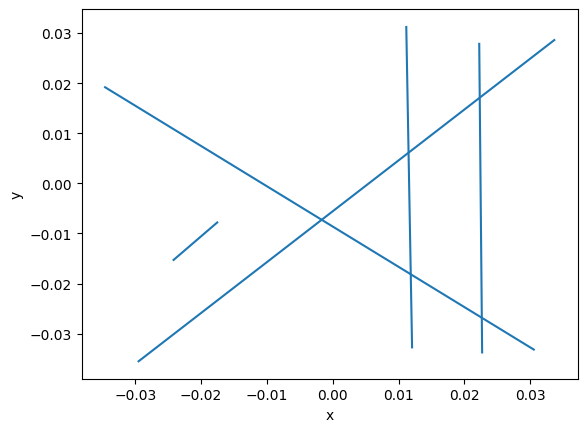

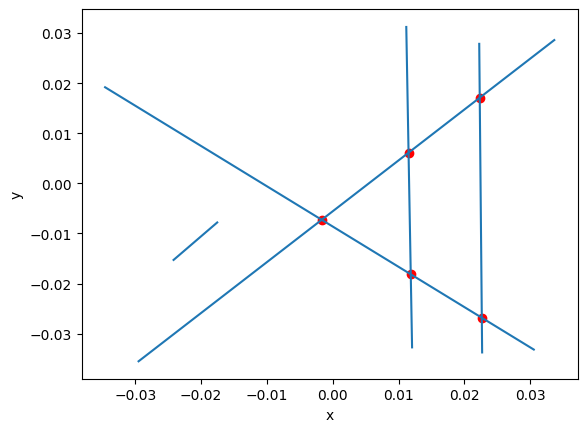

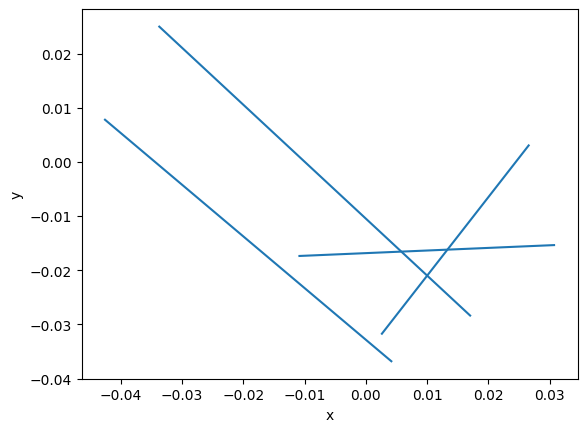

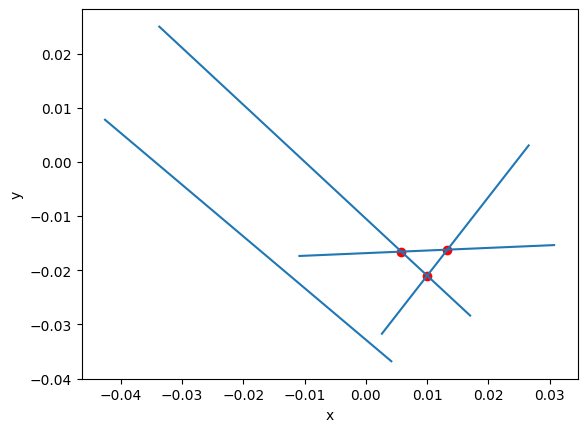

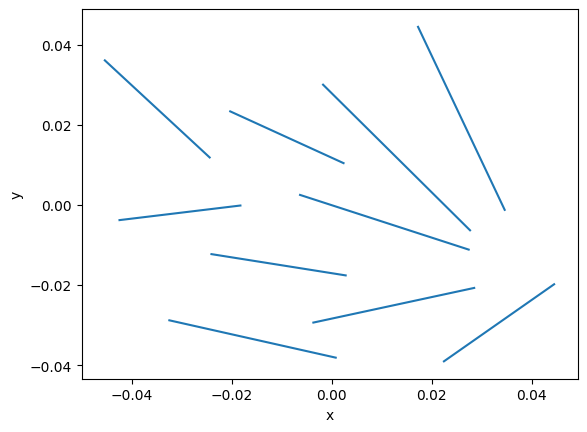

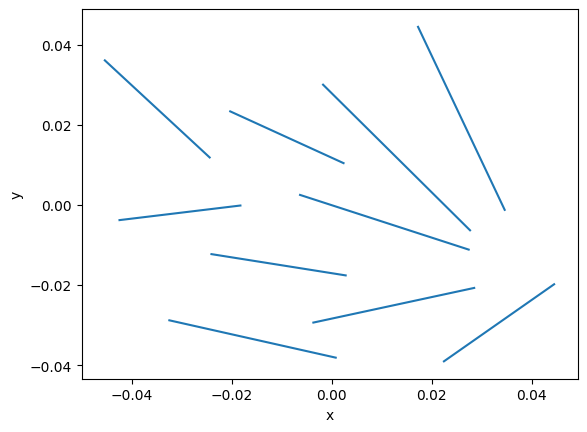

In [1562]:
Test().runtest(3, find_intersections)

In [1563]:
#Funkcja bedzie znajdowala maksymalna wysokosc na jakiej jest punkt
#po to aby, moc zwizualizowac nasza miotle
def find_height(sections):
    n = len(sections)
    max_height = float('-inf')
    min_height = float('inf')
    for i in range(n):
        point1 = sections[i][0]
        point2 = sections[i][1]
        max_height = max(max_height,point1[1],point2[1])
        min_height = min(min_height,point1[1],point2[1])

    return min_height,max_height

In [1564]:
def find_intersections_with_vis(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków - przy tym wizualizujac nastepne kroki naszego algorytmu
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    visSections = Visualizer() #tworzymy sobie wizualizccje
    visSections.add_grid()
    visSections.add_title('Intersection algorithm')
    visSections.add_line_segment(sections,color = "blue") #dodaje linie do mojej wizualizacji

    min_height,max_height = find_height(sections) #potrzebne aby moc odpowiednia dlugosc miotly zaimplementowac
    E = []
    sweepPoisition = deque()

    sections_copy = deepcopy(sections)
    segmentsTabFunction = createFunctionLine(sections)
    sectionsIndex = addIndexToSection(sections)
    Q = createStartEventStructure(sectionsIndex,E,visSections) #nasza struktura zdarzen
    T = SortedSet() #nasza struktura stanu
    intersects = [] #bede tutaj przechowywal w postaci krotek przeciecia danych odcinkow




    while len(Q) > 0: #dopoki nasza struktura zdarzen nie jest pusta - przemiszczam sie miotla po kolejnych zdarzeniach
        sweep = Q[0] #pozyskuje element z mojej struktuy zdarzen
        Q.discard(sweep) #usuwam ten element
        sweep_vis = visSections.add_line_segment( ( (sweep.x,min_height) ,(sweep.x,max_height) ), color = "black")
        E.append(sweep_vis)
        if sweep.orientation != 2:
            E.append(visSections.add_point((sweep.x,sweep.y),color = "orange")) #aktualnie rozpatrywany punkt
        sweepPoisition.append(sweep_vis)

        if sweep.orientation == 0: #miotla sie znajduje na poczatku odcinka
            Q,T,intersects = broomAtTheBeggingSegment(Q,T,sweep,segmentsTabFunction,intersects,E,visSections)


        elif sweep.orientation == 1: #miotla sie znajduje na koncu odcinka
            Q,T,intersects = broomAtTheEndSegment(Q,T,sweep,segmentsTabFunction,intersects,E,visSections)

        elif sweep.orientation == 2:  # miotla znajduje sie na przecieciu odcinka
            last_intersect = intersects[-1]  # pobieram informacje o ostanich odcinkach, ktore zostaly przeciete
            Q, T, intersects = broomAtTheCuttingSegment(Q, T, sweep, segmentsTabFunction, intersects, last_intersect[0],
                                                        last_intersect[1],E,visSections)

        section_done = visSections.add_line_segment(
            (segmentsTabFunction[sweep.lineID].pointA,segmentsTabFunction[sweep.lineID].pointB),color = "plum")
        E.append(section_done)
        visSections.remove_figure(sweepPoisition.pop()) #usuwam dany stan miotły

    draw_with_cut(sections_copy,modifyIntersect(intersects,segmentsTabFunction))

    return modifyIntersect(intersects,segmentsTabFunction),visSections

In [1565]:
test1 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]

test2 =  [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]

test3 =[((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]

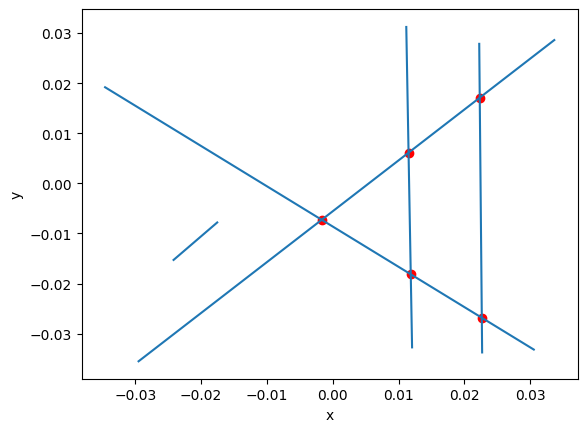

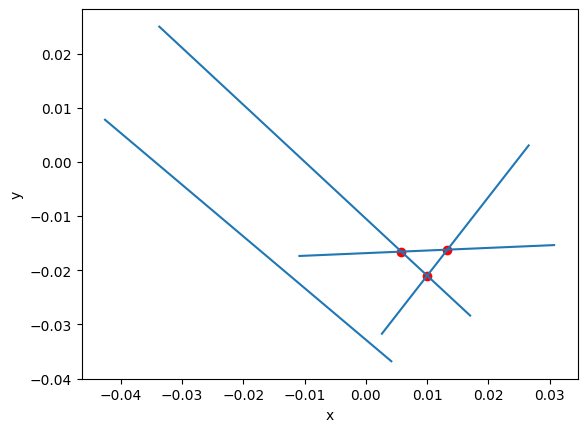

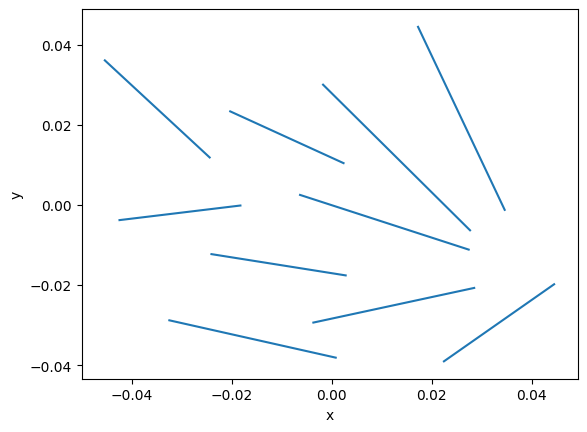

In [1566]:

start = datetime.datetime.now()
test1_intersections,test1_vis = find_intersections_with_vis(test1)
stop = datetime.datetime.now()
TESTS["test1_intersections"] = round((stop - start).total_seconds(),6)
#test1_vis.save_gif(filename="sections_algorithm_gifs/test1_sections_alg",interval=200)

start = datetime.datetime.now()
test2_intersections,test2_vis = find_intersections_with_vis(test2)
stop = datetime.datetime.now()
TESTS["test2_intersections"] = round((stop - start).total_seconds(),6)
#test2_vis.save_gif(filename="sections_algorithm_gifs/test2_sections_alg",interval=200)

start = datetime.datetime.now()
test3_intersections,test3_vis = find_intersections_with_vis(test3)
stop = datetime.datetime.now()
TESTS["test3_intersections"] = round((stop - start).total_seconds(),6)
#test3_vis.save_gif(filename="sections_algorithm_gifs/test3_sections_alg",interval=200)

In [1567]:
print(TESTS)

{'test1_is_intersections': 0.000484, 'test2_is_intersections': 0.000385, 'test3_is_intersections': 0.002129, 'test1_intersections': 0.009972, 'test2_intersections': 0.007906, 'test3_intersections': 0.008582}
